# Teen Market Segmentation Using K-means Clustering¶


Interacting with friends on a social networking service (SNS) has become a rite of passage for teenagers around the world. The many millions of teenage consumers using such sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. For instance, sporting apparel is likely to be a difficult sell to teens with no interest in sports.



# Dataset Information¶


The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile



SO based on the information present in the datset 

and based on these these people are trying tos egment these students into different market customer segments 

first thing we can do is we can find out number of clusters by implementing k-means or hierarchical clustering or DB scan or we can apply TSNE or we can visualize the data on two components using TSNE and find out how many clusters have formed 

and based on the cluster that we have fet from this tsne we can decide on the number of cluster or we can simply use the elbow method in case of k-mean and use the same 

# Load Libraries¶


In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data


In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("snsdata.csv")
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


# Summary Statistics


Summary Statistics of Numerical Variables

In [3]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


# Summary Statistics of Categorical Variables

In [4]:
data.describe(include='object')

,gender
count,27276
unique,2
top,F
freq,22054


# Treating Missing Values¶

In [5]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.

Let's have a look at the number of male and female candidates in our dataset

In [6]:
data['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

Let's have a look at the number of male, female and msiing values

In [7]:
data['gender'].value_counts(dropna = False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

There are 22054 female, 5222 male teen students and 2724 missing values

Now we are going to fill all the null values in gender column with “No Gender”

In [8]:
data['gender'].fillna('not disclosed', inplace = True)

In [9]:
data['gender'].isnull().sum()

0

Also, the age cloumn has 5086 missing values. One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [10]:
data.groupby('gradyear')['age'].mean()



gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable

We now fill the missing values for each graduation year with the mean that we got as above



In [11]:
data['age'] = data.groupby('gradyear').transform(lambda x : x.fillna(x.mean()))


In [12]:
data['age'].isnull().sum()

0

In [13]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

From the above summary we can see that there are no missing values in the dataset

# Treating Outliers

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind. Let's detect the outliers using a box plot below

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


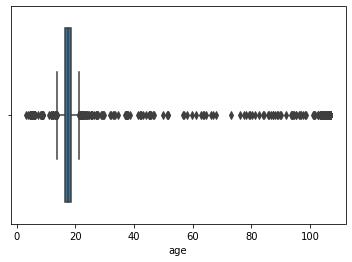

In [14]:
sns.boxplot(data['age'])

In [15]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1

In [16]:
print(iqr)


1.887459224069687


In [17]:
df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]


In [18]:
df['age'].describe()


count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

From the above summary we can observe that after treating the outliers the mininmum age is 13.719000 and the maximum age is 21.158000

In [19]:
df.shape

(29633, 40)

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


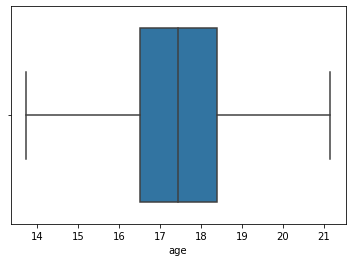

In [20]:
sns.boxplot(df['age'])


From the above boxplot we observe that there are no outliers in the age column

# Data Preprocessing

A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.
The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here. Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager.

In [21]:
names = df.columns[5:40]
scaled_feature = data.copy()
names


Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [22]:
features = scaled_feature[names]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)


In [24]:
features = scaler.transform(features.values)

In [25]:
scaled_feature[names] = features
scaled_feature.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


# Convert object variable to numeric

In [27]:

def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [33]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

# Checking the transformed values

In [34]:
scaled_feature.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


# Building the K-means model

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In [36]:
model = kmeans.fit(scaled_feature)


# Elbow Method

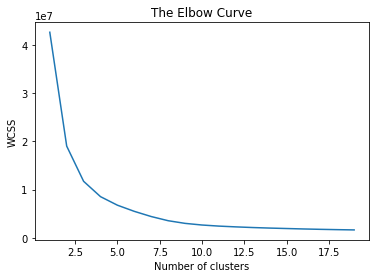

In [37]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result

# Fit K-Means clustering for k=5

In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame.

In [40]:
len(kmeans.labels_)


30000

In [41]:
data['cluster'] = kmeans.labels_


In [42]:
data.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


# Interpreting Clustering Results

Let's see cluster sizes first

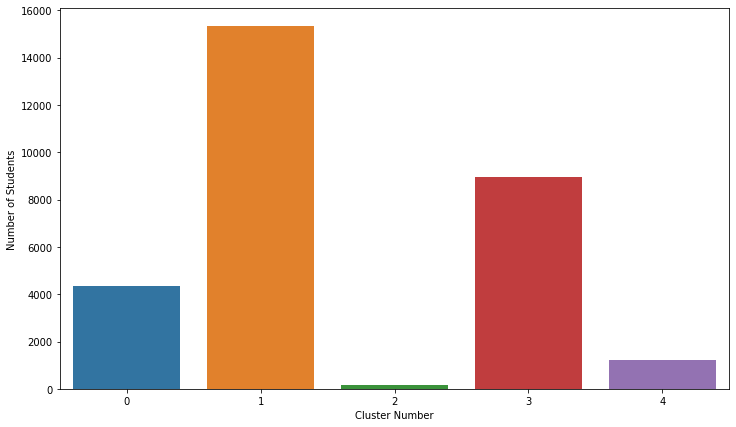

In [43]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")


From the above plot we can see that cluster 0 is the largest and cluster 1 has fewest teen students

Let' see the number of students belonging to each cluster

In [44]:
size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array


[4366, 15324, 146, 8955, 1209]

let's check the cluster statistics

In [45]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,0.139487,0.128035,0.091846,0.151626,0.399221,0.181860,0.159643,0.149565,0.113376,0.502061,0.313330,0.043976,0.778974,0.275080,0.561154,0.338067,0.146816,0.024049,0.454421,0.128722,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
1,0.225007,0.230227,0.193422,0.121248,0.110611,0.115962,0.086596,0.091752,0.081049,0.127056,0.274471,0.207061,0.129405,0.108392,0.094884,0.368637,0.273362,0.035696,0.685787,0.222070,0.414578,0.204451,0.094753,0.019381,0.395001,0.095341,0.080201,0.221026,0.298486,0.134952,0.055142,0.040068,0.178870,0.101018,0.083986,0.064017
2,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,0.143836,0.150685,0.095890,0.143836,0.438356,0.226027,0.164384,0.136986,0.178082,0.486301,0.397260,0.068493,0.732877,0.198630,0.650685,0.239726,0.089041,0.006849,0.678082,0.191781,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
3,0.291681,0.268118,0.245673,0.179341,0.171636,0.152540,0.110218,0.111446,0.094472,0.156449,0.345394,0.224009,0.143942,0.135902,0.109213,0.464433,0.338023,0.046790,0.802122,0.263540,0.480514,0.261977,0.119821,0.022446,0.436628,0.121496,0.121161,0.264545,0.378001,0.157342,0.072473,0.049916,0.194193,0.128867,0.088442,0.056840
4,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,0.210918,0.134822,0.096774,0.138958,0.479735,0.228288,0.200993,0.204301,0.118280,0.565757,0.286187,0.041356,0.773366,0.253929,0.626964,0.376344,0.151365,0.029777,0.521919,0.157155,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.

In [32]:
scaled_feature.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football        float64
soccer          float64
softball        float64
volleyball      float64
swimming        float64
cheerleading    float64
baseball        float64
tennis          float64
sports          float64
cute            float64
sex             float64
sexy            float64
hot             float64
kissed          float64
dance           float64
band            float64
marching        float64
music           float64
rock            float64
god             float64
church          float64
jesus           float64
bible           float64
hair            float64
dress           float64
blonde          float64
mall            float64
shopping        float64
clothes         float64
hollister       float64
abercrombie     float64
die             float64
death           float64
drunk           float64
drugs           float64
dtype: object